<a href="https://colab.research.google.com/github/anshuldeoli/EDA_Project_Team_Notebook/blob/main/EDA_Project_Team_Notebook_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#1. **Playstore Data (main dataset)**

This contains data on the Google Play applications. It has 10,841 rows of data witch has following columns:

*  App Category: Category of the app. This could be beauty, business, medical,art and design entertainment, education...etc.

*  Rating: It has How users rate the app out of 5, with 1 being the lowest rating and 5 being the highest.

*  Reviews: number of user reviews each app has received.

*  Size: The memory size needed to install the application.
 
*  Installs: The number of times each application has been installed by users.

*  Type: Whether the app is free or a paid app.

*  Price: The price of the app.

*  Content Rating: This column specifies the intended audience for the app. Can be for teens, mature audience, or everyone.

*  Genres: The sub-category for each app. Example: for the Education category, this could be Education: Pretend Play, for example.

*  Last Updated: Release date of the most recent update for the app.

*  Current Ver: The app's current version.

*  Android Ver: The oldest version of Android OS supported by the app.

#**Importing Data & Modules**

In [60]:
# Importing required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [61]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# Loading CSV Files
file_path = '/content/drive/MyDrive/Colab Notebooks/Self Project/Copy of Play Store Data.csv'
df=pd.read_csv(file_path)

In [63]:
# Printing first five rows of dataset
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [64]:
df.shape

(10841, 13)

###**There are 10841 rows and 13 coulmns in our dataset**

# **Data Cleaning (Playstore Data)**

In [65]:
# Checking data types of features present in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [66]:
# Created copy of our dataset
df_new = df.copy()

In [67]:
# Cheking for how many null values present in our DataFrame
df_new.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

###**From above we can see in our dataset 'Rating' coulmn has 1474 null values which is maximum as compare to other columns.**

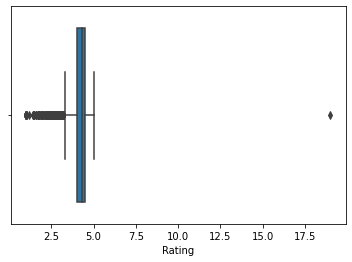

In [68]:
# Boxplot to see whether any outlier present in rating column or not
sns.boxplot(x=df_new['Rating'])

### From above boxplot we can see there is outlier present in 'Rating' coulmn

In [69]:
# Finding outlire present in Rating column because Rating should not to be more than 5.0
df_new[df_new.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [70]:
# To Drop the outlier 
df_new.drop([10472],inplace=True)

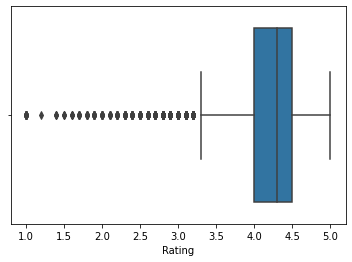

In [71]:
sns.boxplot(x=df_new['Rating'])

In [72]:
# Filling all null values present in 'Rating' coulmn with the median.
median_value= df_new['Rating'].median()
df_new['Rating'].fillna(value=median_value, inplace=True)

In [73]:
df_new['Rating'].isnull().sum()

0

###**Now we can see there is no null value present in the 'Rating' column.**

In [74]:
# Converted 'Reviews' data type from object which included junk to float. 
df_new['Reviews'] = pd.to_numeric(df_new['Reviews'],errors='coerce').convert_dtypes()

In [75]:
# Replacing multiple string i.e '+' and ',' present in 'Price' column.
df_new['Price'] = df_new['Price'].str.replace('$','').replace('Everyone','0.0').astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [76]:
# Created function to convert all mb and kb in size and column to int
def covert_str_to_int(value):
  if value[-1:] == 'k':
    return float(value[:-1])*1024
  elif value[-1:] == 'M':
    return float(value[:-1])*1024*1024
  else:
    return np.nan

In [77]:
# Convert all mb and kb in size and column to int
df_new['Size'] = df_new['Size'].map(lambda x: covert_str_to_int(x))


In [78]:
# Replace the vlaues with Nan
df_new['Size'] =df_new.Size.replace('Varies with device', np.NaN)

In [79]:
# Null values generated by size column
df_new.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [80]:
# Converted object data type of size column to numeric
df_new['Size'] = pd.to_numeric(df_new['Size'])

In [81]:
# Drop the Null Values and size column
df_new.dropna(subset=['Size'], inplace=True)

In [82]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          9145 non-null   float64
 3   Reviews         9145 non-null   Int64  
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   object 
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   float64
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
 10  Last Updated    9145 non-null   object 
 11  Current Ver     9137 non-null   object 
 12  Android Ver     9143 non-null   object 
dtypes: Int64(1), float64(3), object(9)
memory usage: 1009.2+ KB


In [83]:
# Removing '+' and ',' presnt in installs column
df_new['Installs']= df_new['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
df_new['Installs']= df_new['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))

In [84]:
# Converted installs column data type from 'str' to 'int'
df_new['Installs']= df_new['Installs'].astype('int')

In [85]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          9145 non-null   float64
 3   Reviews         9145 non-null   Int64  
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   int64  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   float64
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
 10  Last Updated    9145 non-null   object 
 11  Current Ver     9137 non-null   object 
 12  Android Ver     9143 non-null   object 
dtypes: Int64(1), float64(3), int64(1), object(8)
memory usage: 1009.2+ KB


##**All the columns are converted into required data types**

###Dropping Unwanted Columns in Data Frame

In [86]:
# Dropped 'Last Updated','Current Ver','Android Ver' column from our data type.
df_new.drop(['Last Updated','Current Ver','Android Ver'],axis =1, inplace = True)

In [87]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          9145 non-null   float64
 3   Reviews         9145 non-null   Int64  
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   int64  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   float64
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
dtypes: Int64(1), float64(3), int64(1), object(5)
memory usage: 794.8+ KB


In [88]:
df_new.describe()

,Rating,Reviews,Size,Installs,Price
count,9145.000000,9.145000e+03,9.145000e+03,9.145000e+03,9145.000000
mean,4.193384,2.490487e+05,2.256133e+07,7.114842e+06,1.184366
std,0.502702,1.716211e+06,2.368637e+07,4.619357e+07,17.355754
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000
25%,4.100000,2.200000e+01,5.138022e+06,1.000000e+03,0.000000
50%,4.300000,7.420000e+02,1.363149e+07,1.000000e+05,0.000000
75%,4.500000,2.503700e+04,3.145728e+07,1.000000e+06,0.000000
max,5.000000,4.489389e+07,1.048576e+08,1.000000e+09,400.000000


#**Data Exploration & Visualization**

In [89]:
# Number of application presnt in playstore data with respect to playstore category.
df_new['Category'].value_counts()

FAMILY                 1832
GAME                   1015
TOOLS                   739
MEDICAL                 434
BUSINESS                400
PERSONALIZATION         355
LIFESTYLE               345
SPORTS                  311
FINANCE                 307
PRODUCTIVITY            303
COMMUNICATION           265
HEALTH_AND_FITNESS      264
PHOTOGRAPHY             254
NEWS_AND_MAGAZINES      216
DATING                  212
SOCIAL                  210
SHOPPING                201
BOOKS_AND_REFERENCE     197
TRAVEL_AND_LOCAL        192
VIDEO_PLAYERS           131
EDUCATION               111
MAPS_AND_NAVIGATION     108
FOOD_AND_DRINK          100
ENTERTAINMENT            90
LIBRARIES_AND_DEMO       82
AUTO_AND_VEHICLES        75
HOUSE_AND_HOME           68
ART_AND_DESIGN           62
EVENTS                   57
WEATHER                  57
PARENTING                54
COMICS                   51
BEAUTY                   47
Name: Category, dtype: int64

In [90]:
df = pd.DataFrame(df_new,columns=['Category','Rating'])

In [91]:
df

,Category,Rating
0,ART_AND_DESIGN,4.1
1,ART_AND_DESIGN,3.9
2,ART_AND_DESIGN,4.7
3,ART_AND_DESIGN,4.5
4,ART_AND_DESIGN,4.3
...,...,...
10835,BUSINESS,4.3
10836,FAMILY,4.5
10837,FAMILY,5.0
10838,MEDICAL,4.3


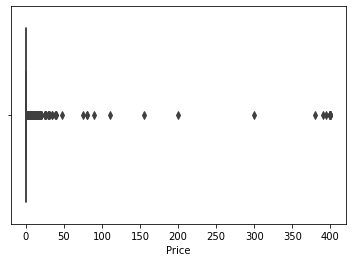

In [92]:
sns.boxplot(x=df_new['Price'])

**From above boxplot we can see that there are very few aps which are having price more than $50.**
**So we are dropping them as they are treated as outlier at the time of visualization.** 

In [93]:
df = df_new.copy()

In [94]:
df.drop(df[df['Price']>=50].index,inplace=True)

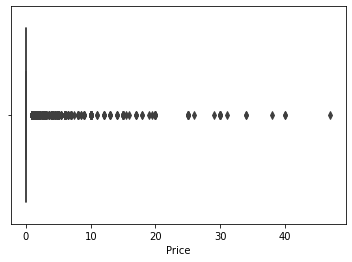

In [95]:
sns.boxplot(x=df['Price'])

In [96]:
df_new.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.073701,0.066039,0.046391,-0.018861
Reviews,0.073701,1.000000,0.238214,0.627720,-0.009839
Size,0.066039,0.238214,1.000000,0.164787,-0.023007
Installs,0.046391,0.627720,0.164787,1.000000,-0.010481
Price,-0.018861,-0.009839,-0.023007,-0.010481,1.000000


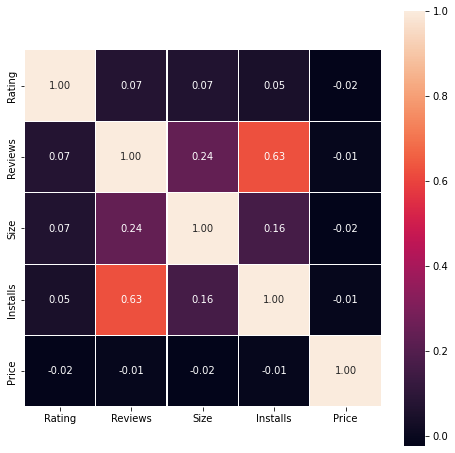

In [97]:
# Heatmap for checking correlation between columns in playstore Dataframe
fig, axes =plt.subplots(figsize=(8, 8))
sns.heatmap(df_new.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

**Number of reviews is highly correlated with the number of installs of the application.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


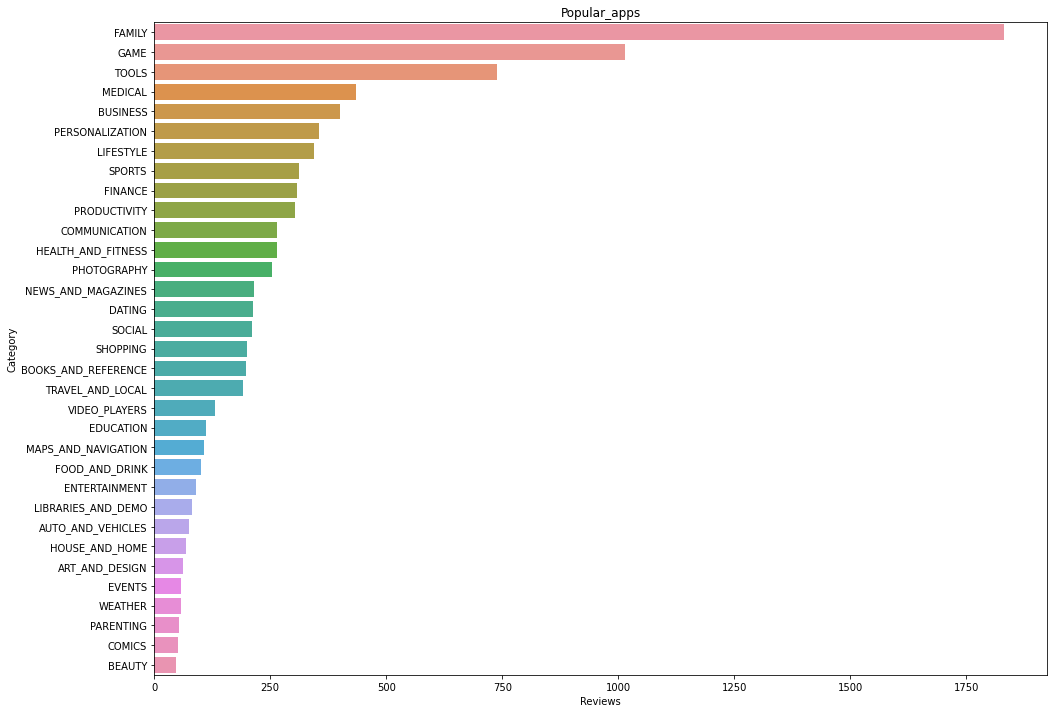

In [98]:
# Plotting barplots for visualize apps reviews w.r.t. category.
apps_category =df_new.Category.value_counts()
plt.figure(figsize=(16, 12))
sns.barplot(apps_category, apps_category.index)
plt.ylabel('Category')
plt.xlabel('Reviews')
plt.title('Popular_apps')
plt.show()

**So there are all total 33 categories in the dataset From the above output we can come to a conclusion that in playstore most of the apps are under Family & Game category and least are of Beauty & Comics Category.**

##**Which category of Apps from the Content Rating column are found more on playstore.**

In [99]:
Category = df_new['Content Rating'].value_counts().index
Values = df_new['Content Rating'].value_counts()

Category_list = []
Values_list = []
for i in range(len(Category)):
    Category_list.append(Category[i])
    Values_list.append(Values[i])

In [100]:
print(Category_list)

['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+', 'Adults only 18+', 'Unrated']


In [101]:
print(Values_list)

[7416, 987, 406, 332, 2, 2]


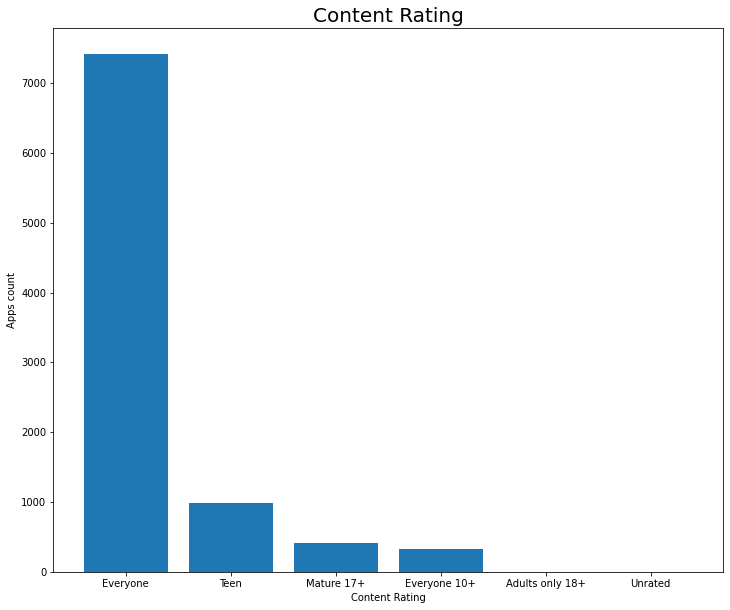

In [102]:
# Plotting the bar graph to visualize Content Rating.
plt.figure(figsize=(12,10))
plt.bar(Category_list,Values_list,width=0.8, alpha= 1);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps count');
plt.xlabel('Content Rating');

**From the above plot we can see that *Everyone* category having majority app count.**

In [103]:
# Creating Dataframe for category wise app installs.
highest_installs_df =df_new.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

In [104]:
highest_installs_df.head()

,Installs
Category,
GAME,29874564253
FAMILY,6798793425
COMMUNICATION,4941943051
NEWS_AND_MAGAZINES,4252005650
TOOLS,3527094815


In [105]:
number_of_installs = []
app_category = []

for i in range(len(highest_installs_df)):
    number_of_installs.append(highest_installs_df.Installs[i])
    app_category.append(highest_installs_df.index[i])


In [106]:
print(number_of_installs)

[29874564253, 6798793425, 4941943051, 4252005650, 3527094815, 2742312744, 2557897655, 1504248785, 1138949498, 998179772, 950960000, 925264802, 891867720, 868411912, 536078560, 437820839, 356666146, 316923484, 278802000, 177688740, 175029890, 141880807, 139962076, 139300020, 99338100, 75112461, 61895910, 46543877, 43770211, 23971010, 17586150, 13696950, 10672151]


In [107]:
app_category

['GAME',
 'FAMILY',
 'COMMUNICATION',
 'NEWS_AND_MAGAZINES',
 'TOOLS',
 'PRODUCTIVITY',
 'PHOTOGRAPHY',
 'SHOPPING',
 'SPORTS',
 'PERSONALIZATION',
 'ENTERTAINMENT',
 'SOCIAL',
 'VIDEO_PLAYERS',
 'HEALTH_AND_FITNESS',
 'BUSINESS',
 'LIFESTYLE',
 'TRAVEL_AND_LOCAL',
 'FINANCE',
 'EDUCATION',
 'FOOD_AND_DRINK',
 'MAPS_AND_NAVIGATION',
 'DATING',
 'BOOKS_AND_REFERENCE',
 'WEATHER',
 'ART_AND_DESIGN',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'MEDICAL',
 'AUTO_AND_VEHICLES',
 'PARENTING',
 'COMICS',
 'BEAUTY',
 'EVENTS']

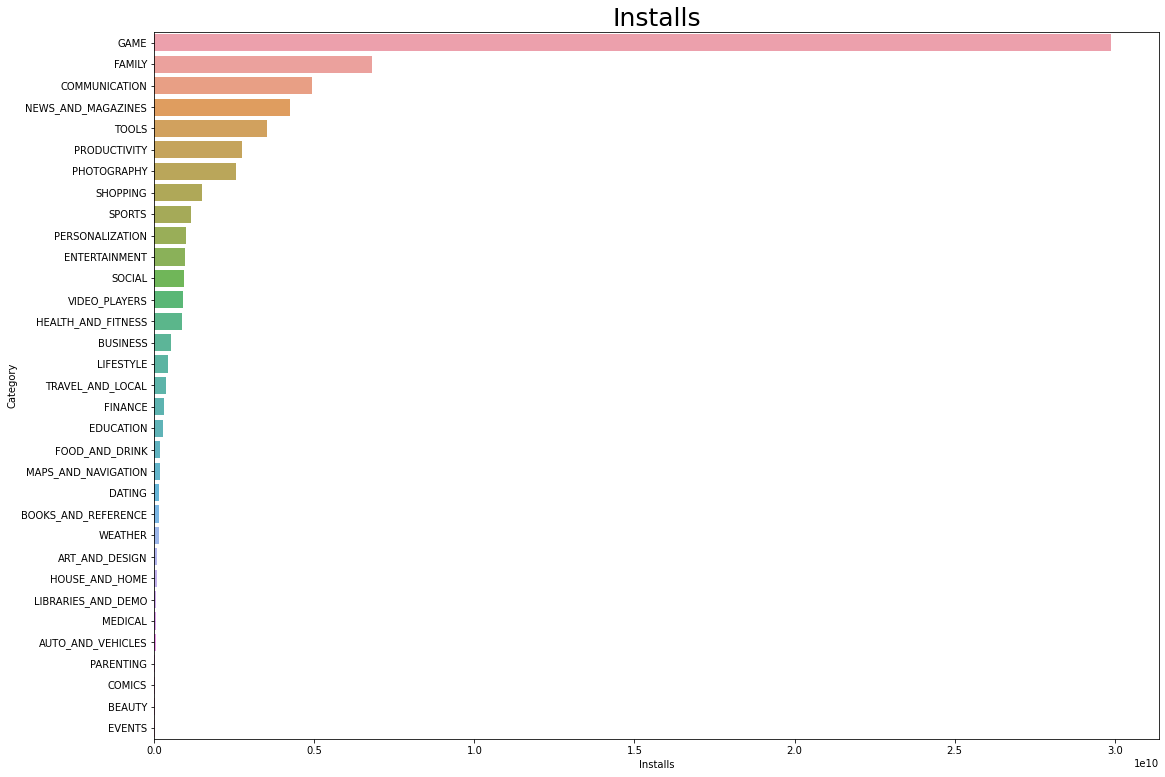

In [108]:
# Plotting barplots for visualize apps category w.r.t. number of installs.
plt.figure(figsize=(18,13))
plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = number_of_installs, y = app_category, alpha =0.9)
graph.set_title("Installs", fontsize = 25);

**From above plot we can see that GAME, FAMILY, COMMUNICATION,    NEWS_AND_MAGAZINES,TOOLS are the most installed category on the playstore.**

##**Let's Visualize top category wise app and see which app is installed most on the playstore**

**Top installed apps in any category**

In [109]:
# Created function for getting top apps w.r.t category
def top_apps_category(str):
    top = df_new[df_new['Category'] == str]
    top_apps = top.sort_values(by='Installs', ascending=False).head(10)
    
    
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(8,5))
    plt.title('Top Installed Apps',size = 10);    
    graph = sns.barplot(x = top_apps.App, y = top_apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');

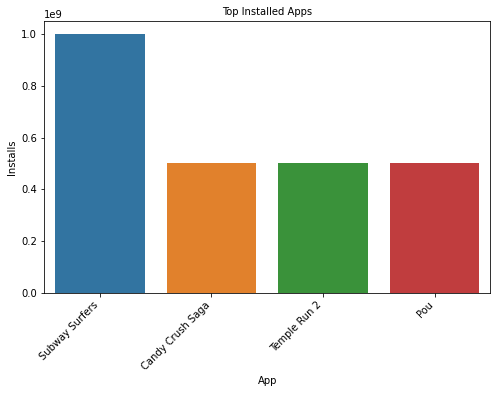

In [110]:
# Top apps for 'GAME' category
top_apps_category('GAME')

**'Subway Surfers', 'Candy Crush Saga', 'Temple Run 2', and 'Pou' are the top install apps of Game category on Playstore.**

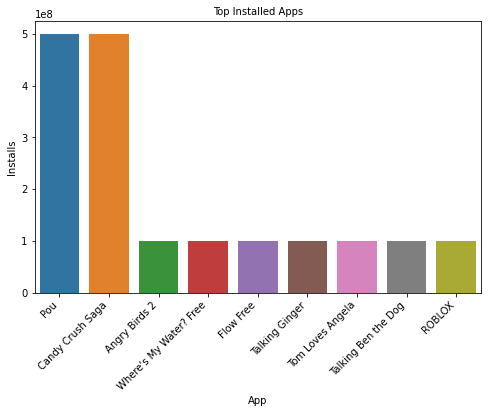

In [111]:
# Top apps for 'FAMILY' category
top_apps_category('FAMILY')

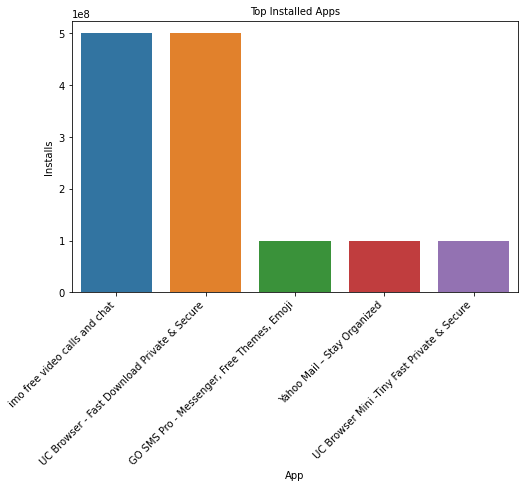

In [112]:
# Top apps for 'COMMUNICATION' category
top_apps_category('COMMUNICATION')

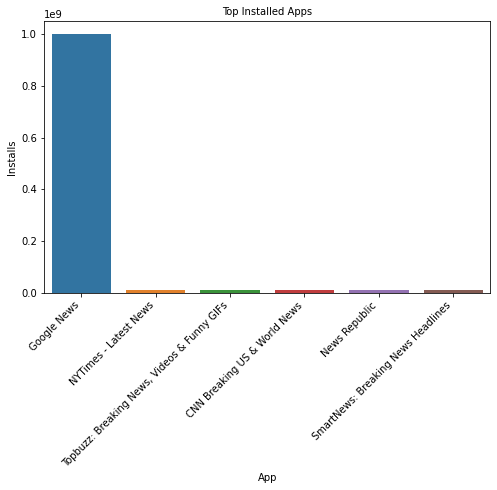

In [113]:
# Top apps for 'NEWS_AND_MAGAZINES' category
top_apps_category('NEWS_AND_MAGAZINES')

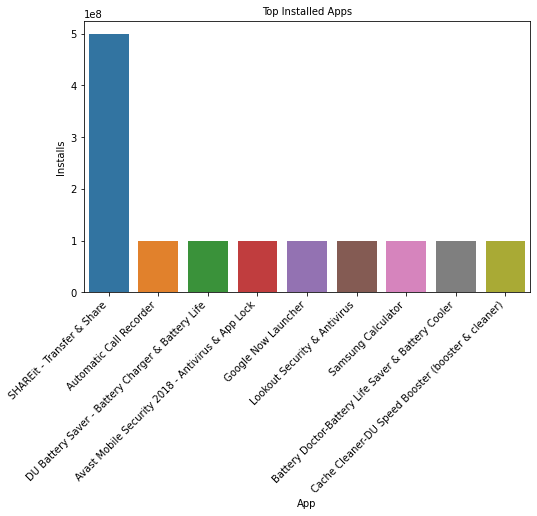

In [114]:
# Top apps for 'Tools' category
top_apps_category('TOOLS')

##**Make a jointplot to understand the effect of size on rating**

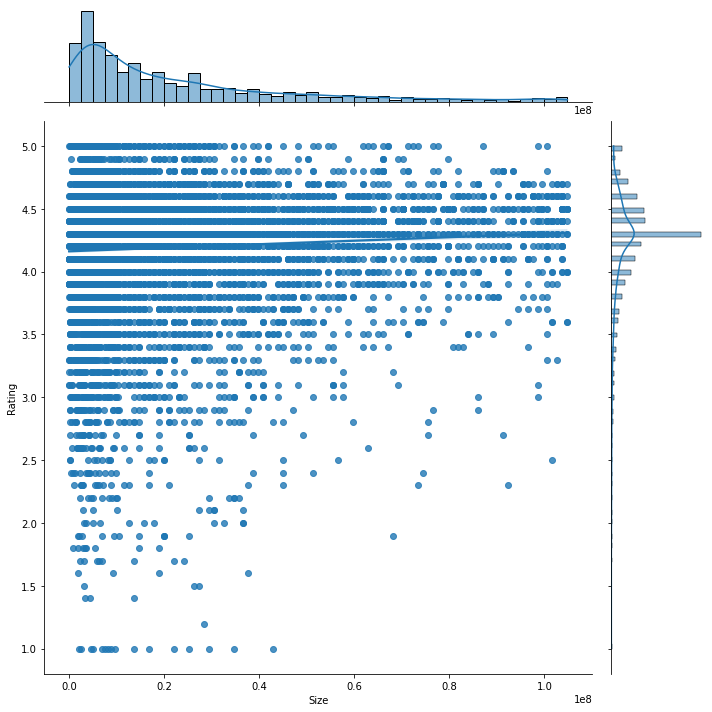

In [115]:
# Visualize the relation between 'Size' and 'Rating'.
sns.jointplot(x = df_new['Size'], y = df_new['Rating'], height=10,  kind= 'reg')
plt.show()

**From above jointplot we can see the app size increases less no of rating.**
**We can say that as app size increase less no of users will use it.**

**Most user gives rating more than 3 - 3.5 to larger size of apps it might be due to its great features.**